Evaluating performance for FP32 vs INT8 model

In [1]:
%cd ..

/Users/matthewding/Documents/GitHub/pi-llama


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/IPython/core/magics/osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt

from exputils import *

In [3]:
# should now be in parent dir
if "logs" not in os.listdir('.'):
    raise Exception("Incorrect working directory. Please double check.")

In [4]:
fp32_run = "outf32-2.txt"
q80_run = "outq80-final.txt"

In [5]:
q80_time_data, q80_cycle_data, q80_num_tokens = parse_logs_for_file(q80_run)

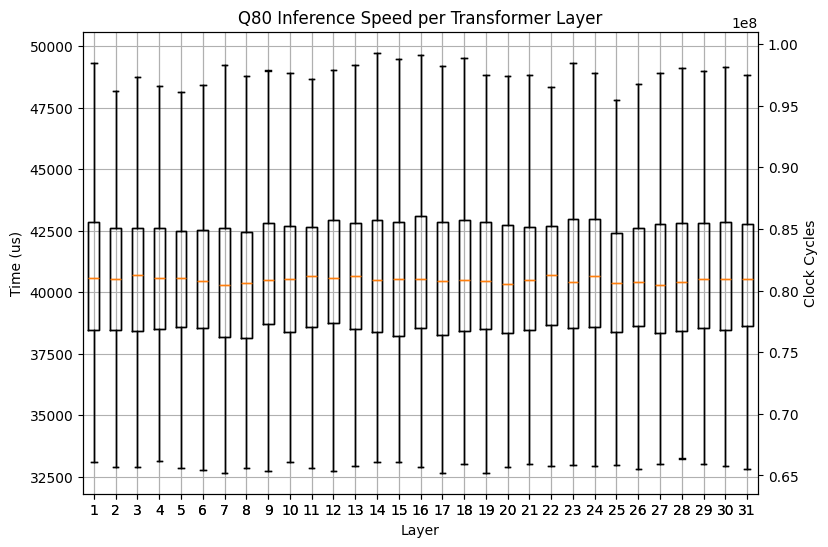

In [6]:
fig, ax1 = plt.subplots(figsize=(10, 6))

box1 = ax1.boxplot(q80_time_data[:, 1:], showfliers=False)
ax1.set_xlabel("Layer")
ax1.set_ylabel("Time (us)")
ax1.set_xticks(np.arange(1, q80_time_data.shape[1]))
ax1.grid(True)

ax2 = ax1.twinx()

box2 = ax2.boxplot(q80_cycle_data[:, 1:], showfliers=False)
ax2.set_ylabel("Clock Cycles")

fig.subplots_adjust(right=0.8)

plt.title("Q80 Inference Speed per Transformer Layer")

plt.show()

In [7]:
q80_time_data[1:, :].shape

(511, 32)

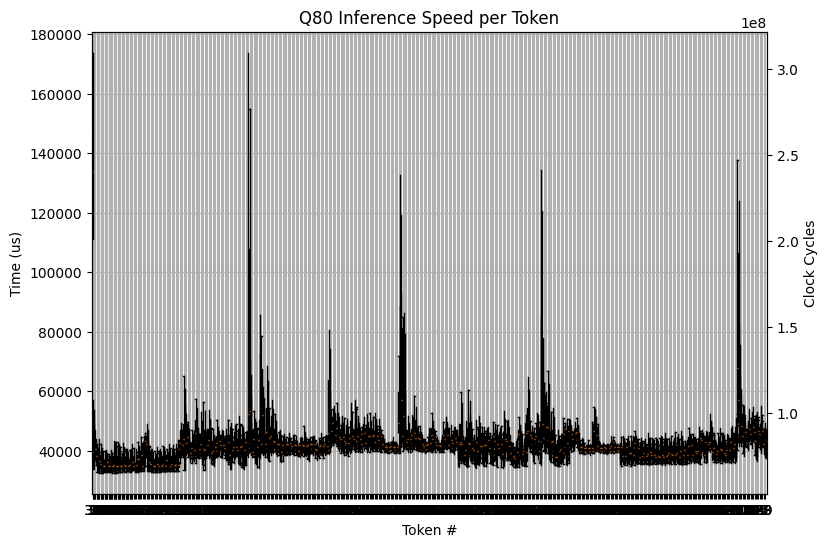

In [8]:
fig, ax1 = plt.subplots(figsize=(10, 6))

box1 = ax1.boxplot(q80_time_data[:, 1:].T, showfliers=False)
ax1.set_xlabel("Token #")
ax1.set_ylabel("Time (us)")
ax1.set_xticks(np.arange(1, q80_time_data.shape[1]))
ax1.grid(True)

ax2 = ax1.twinx()

box2 = ax2.boxplot(q80_cycle_data[1:, 1:].T, showfliers=False)
ax2.set_ylabel("Clock Cycles")

fig.subplots_adjust(right=0.8)

plt.title("Q80 Inference Speed per Token")

plt.show()

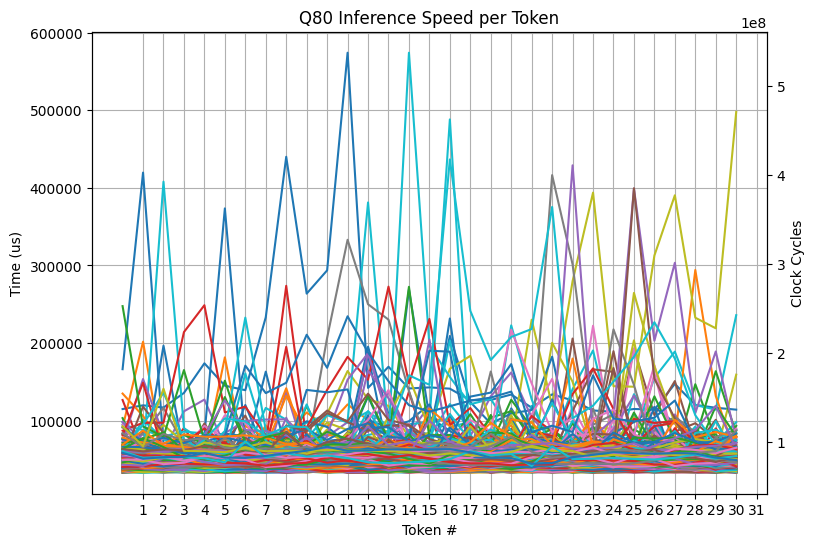

In [9]:
fig, ax1 = plt.subplots(figsize=(10, 6))

box1 = ax1.plot(q80_time_data[:, 1:].T)
ax1.set_xlabel("Token #")
ax1.set_ylabel("Time (us)")
ax1.set_xticks(np.arange(1, q80_time_data.shape[1]))
ax1.grid(True)

ax2 = ax1.twinx()

box2 = ax2.plot(q80_cycle_data[1:, 1:].T)
ax2.set_ylabel("Clock Cycles")

fig.subplots_adjust(right=0.8)

plt.title("Q80 Inference Speed per Token")

plt.show()

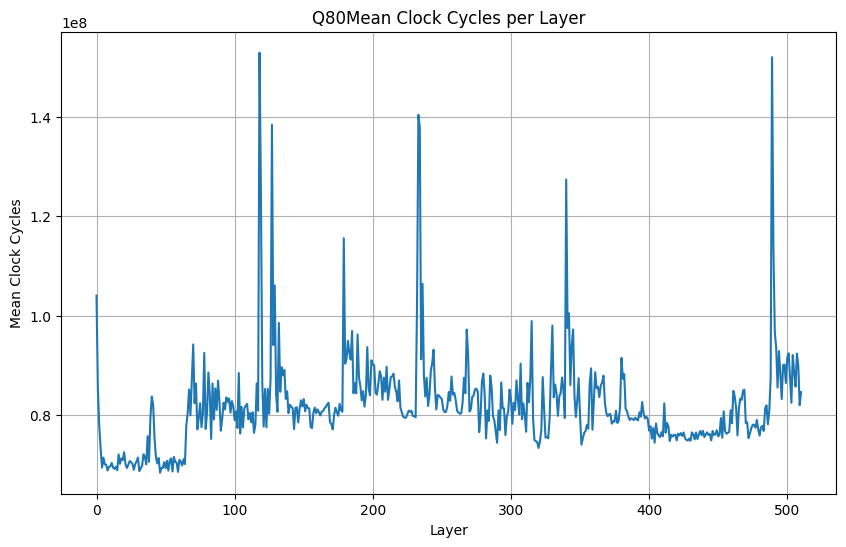

In [10]:
fig, ax1 = plt.subplots(figsize=(10, 6))

ax1.plot(np.mean(q80_cycle_data[1:, :], axis=1), label="Q80")
ax1.set_xlabel("Layer")
ax1.set_ylabel("Mean Clock Cycles")
ax1.set_title("Q80Mean Clock Cycles per Layer")
ax1.grid(True)


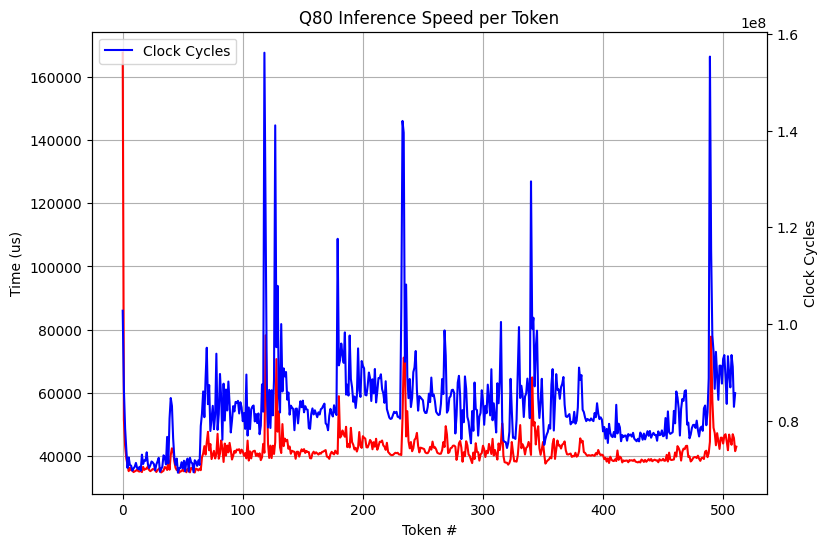

In [50]:
fig, ax1 = plt.subplots(figsize=(10, 6))

box1 = ax1.plot(np.mean(q80_time_data[:, 1:], axis=1), color='r', label="Time (us)")
ax1.set_xlabel("Token #")
ax1.set_ylabel("Time (us)")
ax1.grid(True)

ax2 = ax1.twinx()

box2 = ax2.plot(np.mean(q80_cycle_data[1:, 1:], axis=1), color='b', label="Clock Cycles")
ax2.set_ylabel("Clock Cycles")

fig.subplots_adjust(right=0.8)

plt.legend({"Time (us)", "Clock Cycles"})

plt.title("Q80 Inference Speed per Token")

plt.show()

In [12]:
fp32_time_data, fp32_cycle_data, fp32_num_tokens = parse_logs_for_file(fp32_run)

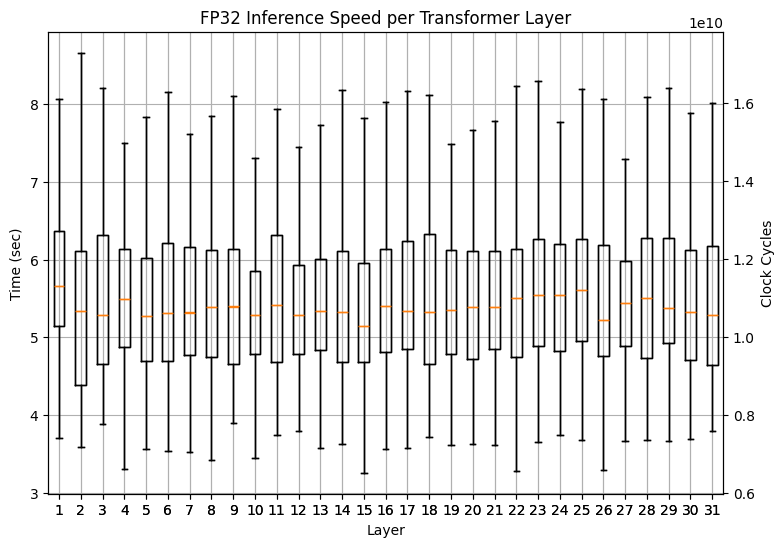

In [31]:
fig, ax1 = plt.subplots(figsize=(10, 6))

box1 = ax1.boxplot(fp32_time_data[:, 1:] / 1e6, showfliers=False)
ax1.set_xlabel("Layer")
ax1.set_ylabel("Time (sec)")
ax1.set_xticks(np.arange(1, q80_time_data.shape[1]))
ax1.grid(True)

ax2 = ax1.twinx()

box2 = ax2.boxplot(fp32_cycle_data[:, 1:], showfliers=False)
ax2.set_ylabel("Clock Cycles")

fig.subplots_adjust(right=0.8)

plt.title("FP32 Inference Speed per Transformer Layer")

plt.show()

Text(0.5, 1.0, 'Q80 Inference Speed per Transformer Layer')

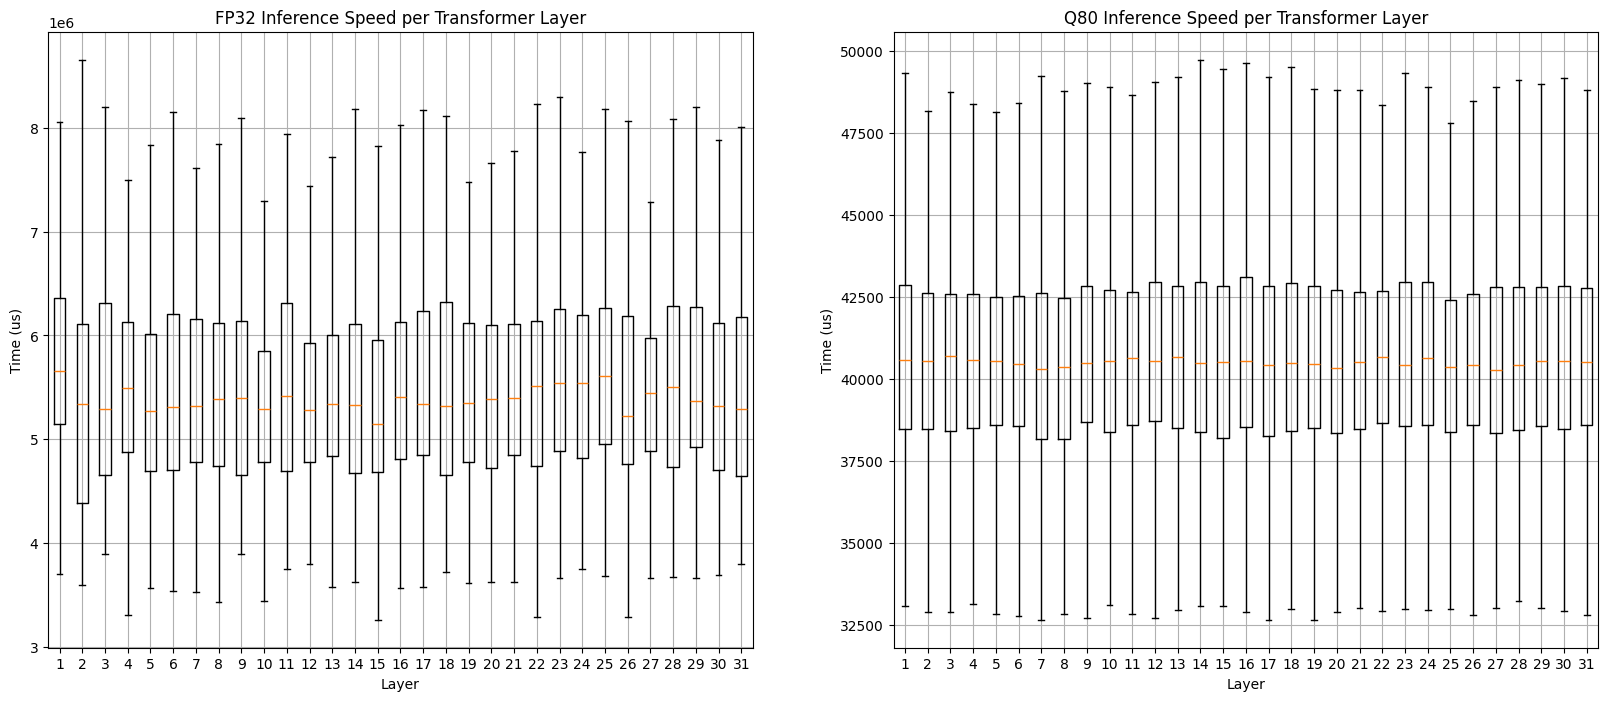

In [17]:
fig, ax1 = plt.subplots(1, 2, figsize=(20, 8))

box1 = ax1[0].boxplot(fp32_time_data[:, 1:], showfliers=False)
ax1[0].set_ylabel("Time (us)")
ax1[0].set_xlabel("Layer")
ax1[0].set_xticks(np.arange(1, q80_time_data.shape[1]))
ax1[0].grid(True)
ax1[0].set_title("FP32 Inference Speed per Transformer Layer")

box2 = ax1[1].boxplot(q80_time_data[:, 1:], showfliers=False)
ax1[1].set_xlabel("Layer")
ax1[1].set_ylabel("Time (us)")
ax1[1].set_xticks(np.arange(1, q80_time_data.shape[1]))
ax1[1].grid(True)
ax1[1].set_title("Q80 Inference Speed per Transformer Layer")

In [112]:
TICK_EVERY = 8

[Text(0, 0, '0'),
 Text(8, 0, '8'),
 Text(16, 0, '16'),
 Text(24, 0, '24'),
 Text(32, 0, '32'),
 Text(40, 0, '40'),
 Text(48, 0, '48'),
 Text(56, 0, '56'),
 Text(64, 0, '64'),
 Text(72, 0, '72'),
 Text(80, 0, '80'),
 Text(88, 0, '88'),
 Text(96, 0, '96'),
 Text(104, 0, '104'),
 Text(112, 0, '112'),
 Text(120, 0, '120')]

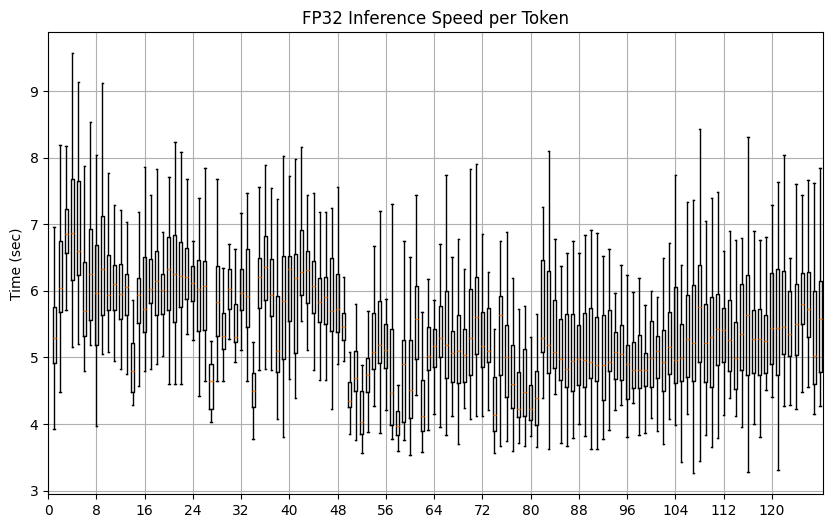

In [113]:
fig, ax = plt.subplots(figsize=(10, 6))
box = ax.boxplot(fp32_time_data[:, 1:].T / 1e6, showfliers=False)
ax.set_ylabel("Time (sec)")
ax.grid(True)
plt.title("FP32 Inference Speed per Token")

num_tokens = fp32_time_data.shape[0] - 1
tick_locations = range(0, num_tokens + 1, TICK_EVERY)
tick_labels = [str(i) for i in tick_locations]

ax.set_xticks(tick_locations)
ax.set_xticklabels(tick_labels)

[Text(0, 0, '0'),
 Text(16, 0, '16'),
 Text(32, 0, '32'),
 Text(48, 0, '48'),
 Text(64, 0, '64'),
 Text(80, 0, '80'),
 Text(96, 0, '96'),
 Text(112, 0, '112'),
 Text(128, 0, '128'),
 Text(144, 0, '144'),
 Text(160, 0, '160'),
 Text(176, 0, '176'),
 Text(192, 0, '192'),
 Text(208, 0, '208'),
 Text(224, 0, '224'),
 Text(240, 0, '240')]

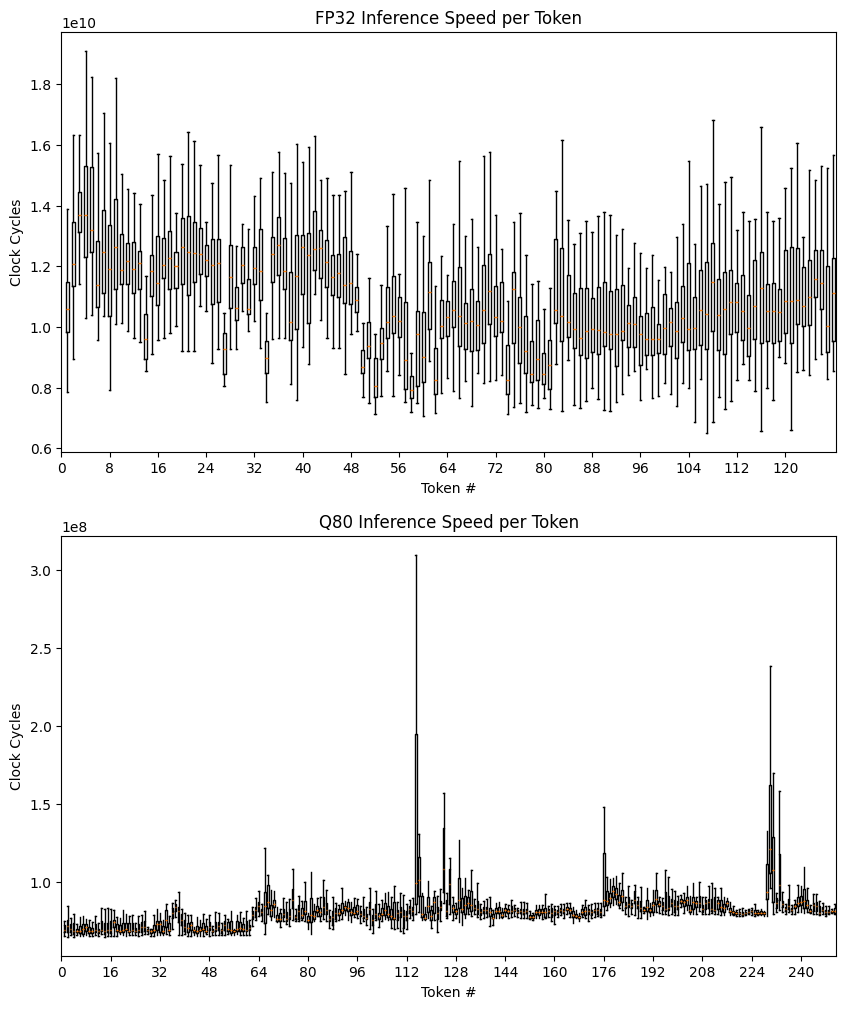

In [124]:
fig, ax1 = plt.subplots(2, 1, figsize=(10, 12))

box1 = ax1[0].boxplot(fp32_cycle_data[:, 1:].T, showfliers=False)
ax1[0].set_ylabel("Clock Cycles")
ax1[0].set_xlabel("Token #")
num_tokens = fp32_time_data.shape[0] - 1
tick_locations = range(0, num_tokens + 1, TICK_EVERY)
tick_labels = [str(i) for i in tick_locations]
ax1[0].set_title("FP32 Inference Speed per Token")

# take only 256 samples
q80_cycle_data = q80_cycle_data[5:256, :]
ax1[0].set_xticks(tick_locations)
ax1[0].set_xticklabels(tick_labels)

box2 = ax1[1].boxplot(q80_cycle_data[:, 1:].T, showfliers=False)
ax1[1].set_xlabel("Token #")
ax1[1].set_ylabel("Clock Cycles")
num_tokens = q80_cycle_data.shape[0] - 1
ax1[1].set_title("Q80 Inference Speed per Token")

tick_locations = range(0, num_tokens + 1, TICK_EVERY * 2)
tick_labels = [str(i) for i in tick_locations]

ax1[1].set_xticks(tick_locations)
ax1[1].set_xticklabels(tick_labels)